# **Project Name**    -  Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual - Meghana



# **Project Summary -**

Max Life Insurance, a leading health insurance provider in India, aims to enhance its business model by identifying health insurance policyholders likely to purchase vehicle insurance. The primary objective of this project is to develop a predictive model that enables targeted marketing, improves cross-selling opportunities, and increases revenue by personalizing outreach efforts.

By leveraging machine learning, this project seeks to analyze demographic, vehicle-related, and policy-specific attributes to predict the probability of a customer’s interest in vehicle insurance. An accurate model will empower Max Life Insurance to optimize resource allocation, focus on high-potential leads, and improve customer experience by offering relevant products.

The dataset includes various attributes related to customer demographics, vehicle details, and policy-related information, such as:

**Demographic Features**: Gender, Age, Region Code Type

**Vehicle Information**: Vehicle Age, History of Vehicle Damage

**Policy Details**: Annual Premium, Policy Sourcing Channel

**Other Attributes**: Additional behavioral and categorical insights contributing to the likelihood of interest in vehicle insurance

Next I implemented three machine learning algorithms namely, 'LogisticRegression', 'RandomForestClassifier','XGBClassifier'.

# **GitHub Link -**

https://github.com/megh34/Health-Insurance-Cross-Sell-Prediction.git

# **Problem Statement**


### **Problem Statement**  

Max Life Insurance, a leading health insurance provider in India, seeks to enhance its cross-selling efficiency by accurately identifying health insurance policyholders who are most likely to purchase vehicle insurance. Traditional marketing strategies rely on broad outreach, leading to suboptimal customer targeting, increased acquisition costs, and lower conversion rates.  

The objective of this project is to develop a **predictive machine learning model** that leverages demographic, vehicle-related, and policy-specific data to forecast customer interest in vehicle insurance. The model should enable data-driven decision-making by prioritizing high-potential customers, reducing unnecessary marketing expenses, and improving customer engagement.  



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [92]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_score, recall_score, f1_score,accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Dataset Loading

In [93]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
#Import dataset
df = pd.read_csv("/content/drive/MyDrive/Projectmodule6/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")    #read_csv functions reads csv file

### Dataset First View

In [95]:
# Dataset First Look
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Dataset Rows & Columns count

In [97]:
# Dataset Rows & Columns count

df.shape    #shape function returns no of rows and columns

(381109, 12)

### Dataset Information

In [98]:
# Dataset Info
df.info() #info function gives data types and null values information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [99]:
# Dataset Duplicate Value Count
df.duplicated().sum()   #duplicated function gives duplicated values

0

#### Missing Values/Null Values

In [100]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


### What did you know about your dataset?

The dataset is **huge**, containing a whopping **381,109 rows** (individual records) and **12 columns** . **There are no missing values**—every single entry is complete, meaning we don’t have to worry about gaps in the data. Plus, **there are no duplicate records**, so we don’t have to clean out any repeated information. This makes our job much easier since we can jump straight into analyzing and building our machine learning model without spending time fixing missing or duplicate data!

## ***2. Understanding Your Variables***

In [101]:
# Dataset Columns
df.columns #gives name of all columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [102]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

- **ID**: Unique identifier for each customer.  
- **Gender**: Indicates whether the customer is male or female.  
- **Age**: The age of the customer.  
- **Driving_License**:
  - `0` → Customer does **not** have a driving license.  
  - `1` → Customer **has** a driving license.  
- **Region_Code**: Unique numerical code representing the customer’s region.  
- **Previously_Insured**:  
  - `1` → Customer **already** has vehicle insurance.  
  - `0` → Customer **does not** have vehicle insurance.  
- **Vehicle_Age**: The number of years since the customer’s vehicle was manufactured.  
- **Vehicle_Damage**:  
  - `1` → The vehicle has been **damaged** in the past.  
  - `0` → The vehicle has **never** been damaged.  
- **Annual_Premium**: The yearly amount the customer must pay for insurance coverage.  
- **PolicySalesChannel**: An anonymized code representing the method used to contact the customer (e.g., agent, phone, email, in person).  
- **Vintage**: The number of days the customer has been associated with the company.  
- **Response**:  
  - `1` → The customer is **interested** in buying vehicle insurance.  
  - `0` → The customer is **not interested** in buying vehicle insurance.  

### Check Unique Values for each variable.

In [103]:
# Check Unique Values for gender.
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [104]:
# Check Unique Values for Vehival age.
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [105]:
#check unique values in all columns
df.nunique()

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


## 3. ***Data Wrangling***

### Data Wrangling Code

In [106]:
# Write your code to make your dataset analysis ready.
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### What all manipulations have you done and insights you found?

After loading the dataset, I thoroughly examined it for any missing values and found none. Since the dataset is already complete, no further data imputation or cleaning is required at this stage.









## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1:Histogram

Distribution of Age

<Axes: xlabel='Age', ylabel='Count'>

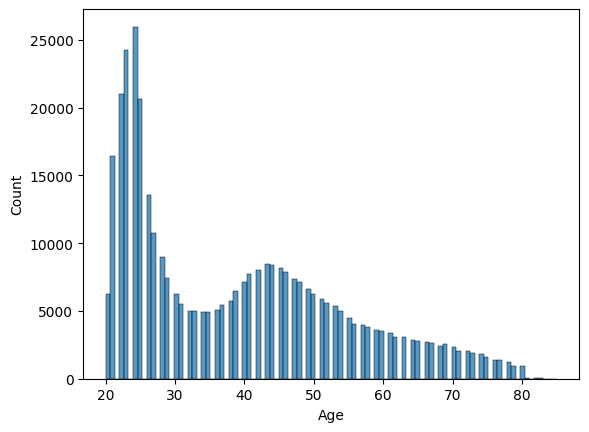

In [107]:
# Chart - 1 visualization code
fig1 = sns.histplot(df['Age'])
fig1

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:
Here are some insights from the **Age Distribution Histogram**:  

1. **Younger Age Group is Dominant**
   - The highest concentration of customers falls between **20 to 30 years old**, indicating that younger individuals form a significant portion of the dataset.  
   
2. **Bimodal Distribution (Two Peaks) Observed**
   - There's a **secondary peak** around **40–50 years**, suggesting another group of middle-aged customers interested in insurance.  
   - This could imply that both young adults and middle-aged individuals are key target demographics.  

3. **Gradual Decline in Older Age Groups**
   - The number of customers decreases steadily after **50 years old**, with very few policyholders above **70**.  
   - This suggests that older individuals are less likely to purchase or be targeted for vehicle insurance.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Target marketing efforts** on the **20–30 and 40–50 age groups** to maximize customer engagement.  
 Explore why older individuals (60+) show **less interest**—is it due to ownership patterns, lifestyle, or affordability?  
If the goal is expansion, consider ways to attract **senior customers** with tailored policies.  

#### Chart - 2

2.How many customers accepted plan ?

In [108]:
# Chart - 2 visualization code
fig2 = df['Response'].value_counts()
fig2

,count
Response,
0,334399
1,46710


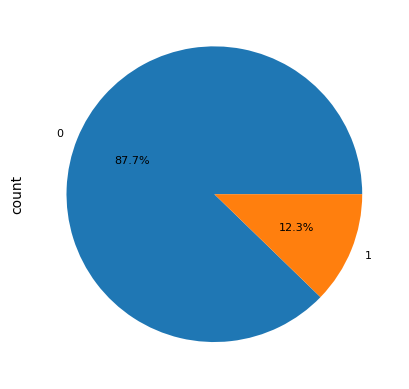

In [109]:
#plot pie chart
fig2.plot.pie(labels = fig2.index ,autopct = '%.1f%%',fontsize=8,labeldistance=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of data visualization that represent data in a circular graph, where each slice of the pie represents a proportion of the whole. Pie charts are useful for conveying relative proportions of different categories or components within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.87% of customers are not interested in purchasing vehicle insurance.

2.Only 12.3% customers accepted the offer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This indicates a strong class imbalance, which can impact model performance if not handled properly.Since the majority of customers aren't interested, blindly targeting all customers would result in low conversion rates and high marketing costs.A data-driven approach is crucial to identify potential buyers efficiently.

#### Chart - 3

3.How many customers are previously taken vehical insurance?

In [110]:
# Chart - 3 visualization code
fig3 = df['Previously_Insured'].value_counts()
fig3

,count
Previously_Insured,
0,206481
1,174628


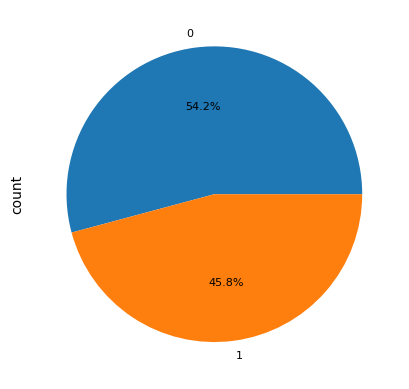

In [111]:
#plot pie chart
fig3.plot.pie(labels = fig3.index ,autopct = '%.1f%%',fontsize=8,labeldistance=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of data visualization that represent data in a circular graph, where each slice of the pie represents a proportion of the whole. Pie charts are useful for conveying relative proportions of different categories or components within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.54% of customers dont have any previous vehical insurance

2.45.8% of customers have previous vehical insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the characteristics of the uninsured customers can help refine targeting strategies.

Segment & Target uninsured customers with personalized insurance offers.

Analyze patterns to understand why some people remain uninsured—cost, awareness, or lack of need

Leverage marketing channels (email, calls, agents) to focus on the 54.2% uninsured segment.

#### Chart - 4

4.How many customers have driving license ?

In [112]:
# Chart - 4 visualization code
fig4 = df['Driving_License'].value_counts()
fig4


,count
Driving_License,
1,380297
0,812


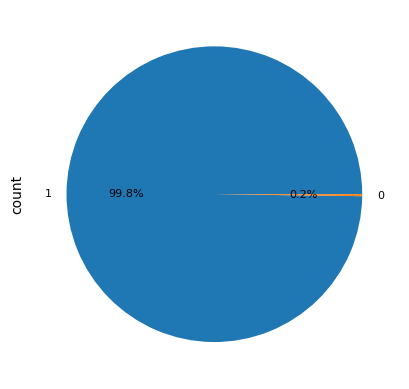

In [113]:
#plot pie chart
fig4.plot.pie(labels = fig4.index ,autopct = '%.1f%%',fontsize=8,labeldistance=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of data visualization that represent data in a circular graph, where each slice of the pie represents a proportion of the whole. Pie charts are useful for conveying relative proportions of different categories or components within a dataset.

##### 2. What is/are the insight(s) found from the chart?



1.99.8% customers have the driving license.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since the majority class (1) dominates, the Driving_License feature may not be very useful for predictive modeling.

It may not significantly contribute to distinguishing between customers interested or not interested in vehicle insurance.

#### Chart - 5

5.Gender vs Response ?

In [114]:
# Chart - 5 visualization code
df.groupby(['Gender','Response']).size()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
dtype: int64

In [115]:
#find percentages
x = df.groupby(['Gender','Response']).size()*100/df.groupby('Gender').size()
fig5 = x.unstack()
fig5

Response,0,1
Gender,,
Female,89.609759,10.390241
Male,86.158893,13.841107


<Axes: xlabel='Gender'>

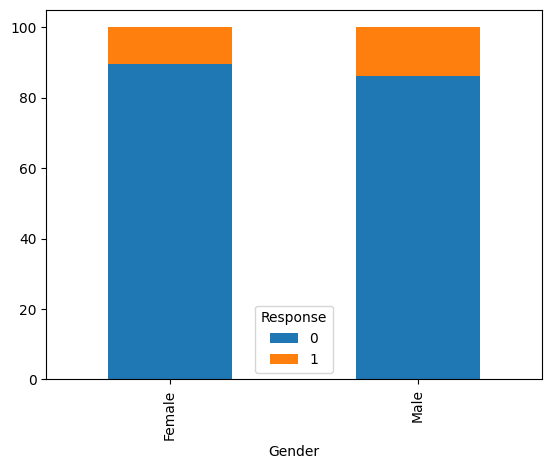

In [116]:
#plot stacked bar chart
fig5.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Both males and females have a similar proportion of interest in vehicle insurance.
The majority of customers (over 80% in both genders) are not interested in purchasing vehicle insurance.
A small percentage (less than 20%) of both males and females have expressed interest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart does not provide a strong business impact.Consider excluding gender from the predictive model if it has low correlation with the target variable

#### Chart - 6

6.Vehical age vs Response?

In [117]:
# Chart - 6 visualization code
x = df.groupby(['Vehicle_Age','Response']).size()*100/df.groupby('Vehicle_Age').size()
fig6 = x.unstack()
fig6

Response,0,1
Vehicle_Age,,
1-2 Year,82.624453,17.375547
< 1 Year,95.629483,4.370517
> 2 Years,70.625351,29.374649


<Axes: xlabel='Vehicle_Age'>

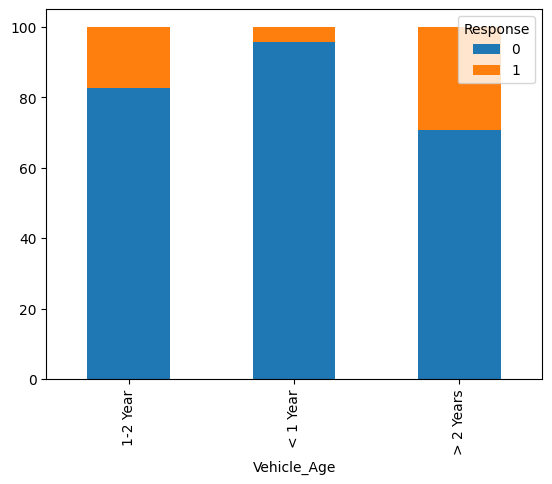

In [118]:
#plot stacked bar chart
fig6.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

1. Older Vehicles Show More Interest in Insurance - This indicates that owners of older vehicles **perceive a higher risk** and are more likely to seek coverage.
2. Newer Vehicles Show the Least Interest - This might be because **new cars often come with manufacturer warranties** or existing insurance coverage.  
3. Moderate Interest for 1-2 Year Old Vehicles  - This suggests that as vehicles age, customers **become more inclined** toward buying insurance.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  
**Target customers with vehicles older than 2 years** by offering **personalized premium discounts** and policy benefits.  
**Educate new vehicle owners** about the advantages of insurance beyond manufacturer coverage.  
**Design marketing campaigns** focusing on the increasing need for insurance as vehicles age.  

#### Chart - 7

7.Vehical Damage vs Response?

In [119]:
# Chart - 7 visualization code
x = df.groupby(['Vehicle_Damage','Response']).size()*100/df.groupby('Vehicle_Damage').size()
fig7 = x.unstack()
fig7

Response,0,1
Vehicle_Damage,,
No,99.479586,0.520414
Yes,76.234454,23.765546


<Axes: xlabel='Vehicle_Damage'>

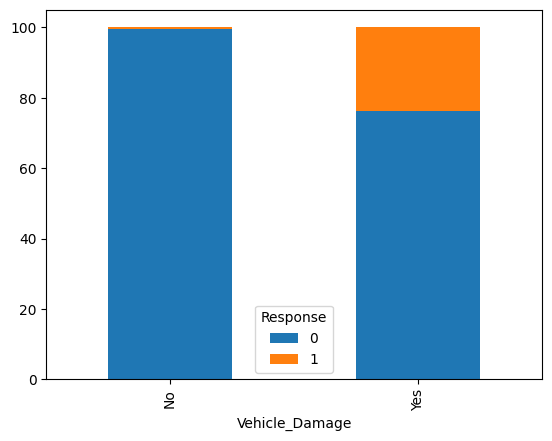

In [120]:
#plot stacked bar chart
fig7.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Customers with past vehicle damage show higher interest in insurance

2.Customers without past damage show almost no interest

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact. Target customers who had past vehicle damage with customized insurance plans emphasizing protection.
Educate customers with no prior damage about unexpected risks and how insurance provides security.
Offer first-time buyers limited-time discounts to encourage early adoption of insurance plans.

#### Chart - 8

8.Age vs Response?

<Axes: xlabel='Age', ylabel='Count'>

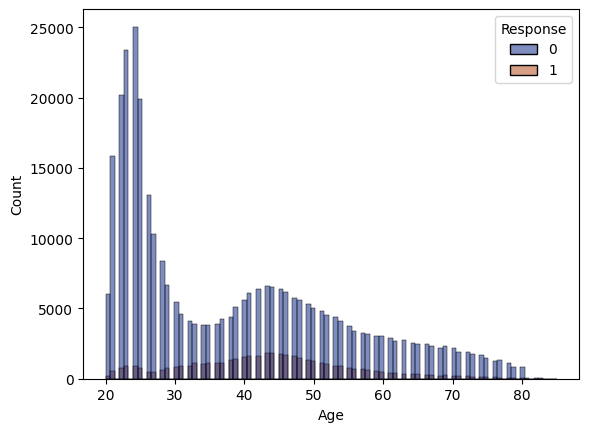

In [121]:
# Chart - 8 visualization code
sns.histplot(df,x = 'Age',hue = 'Response',palette='dark')

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Majority of the Customers between age of 20-30 and greater than 60 are not accepting plan.

2.Customers between age of 40-50 are accepting plan compare to all age groups.

The overall response rate (customers interested in insurance) is much lower than those not interested across all age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.This insight helps in targeted marketing, focusing more on mid-age and older customers who show higher interest in purchasing insurance.

#### Chart - 9

9.Previously Insured vs Response?

In [122]:
# Chart - 9 visualization code
x = df.groupby(['Previously_Insured','Response']).size()*100/df.groupby('Previously_Insured').size()
fig9 = x.unstack()
fig9

Response,0,1
Previously_Insured,,
0,77.454584,22.545416
1,99.909522,0.090478


<Axes: xlabel='Previously_Insured'>

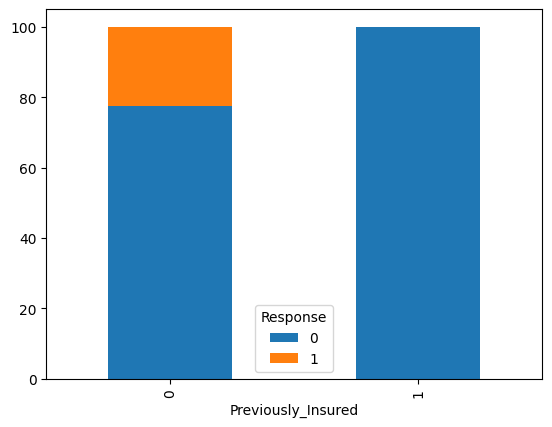

In [123]:
#plot bar chart
fig9.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Customers who were previously insured (1) have an almost 0% positive response rate, meaning they are highly unlikely to purchase vehicle insurance.

2.Customers who were not previously insured (0) show a higher positive response rate, indicating they are more likely to purchase vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact. Focus marketing efforts on previously uninsured customers, as they have a significantly higher likelihood of conversion.Avoid wasting resources on customers who are already insured elsewhere, optimizing marketing budget allocation.Personalized offers and promotions for previously uninsured customers can increase policy sales and revenue.










#### Chart - 10

10.Vintage vs Response ?

<Axes: xlabel='Vintage', ylabel='Count'>

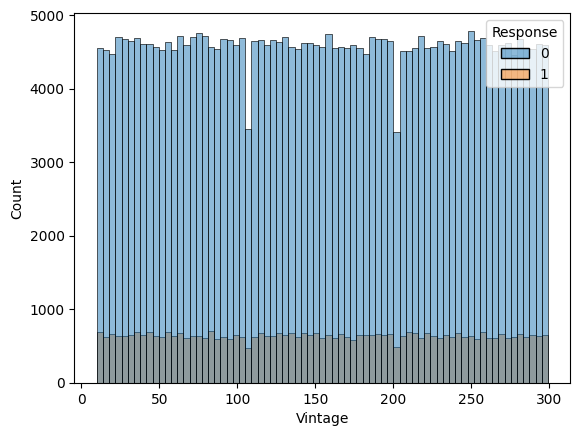

In [124]:
# Chart - 10 visualization code
sns.histplot(df,x= 'Vintage',hue = 'Response')

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.The distribution of responses remains fairly uniform across different vintage (customer tenure) values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Vintage does not appear to be a strong differentiator for targeting potential buyers.

#### Chart - 11

11.Age vs Previously Insured?

<Axes: xlabel='Age', ylabel='Count'>

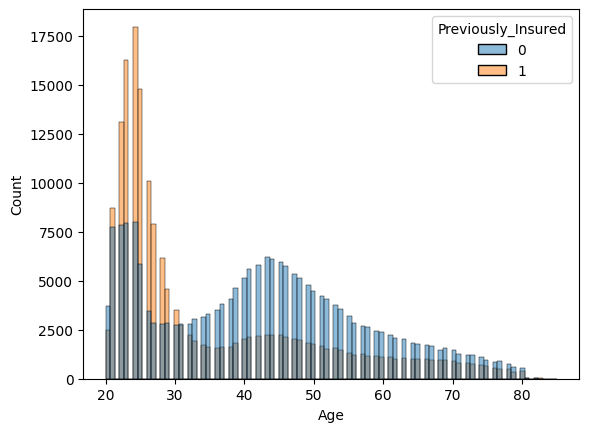

In [125]:
# Chart - 10 visualization code
sns.histplot(df,x= 'Age',hue = 'Previously_Insured')

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.More number of customers of age group  between 20-30 are previously insuranced.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.Since older customers are less likely to be previously insured, they can be targeted for new insurance policies.Since many young customers are already insured, companies should offer competitive renewal plans to retain them.


#### Chart - 12

12.Vehical_Age vs previously_Insuranced?

In [126]:
# Chart - 12 visualization code
x = df.groupby(['Vehicle_Age','Previously_Insured']).size()*100/df.groupby('Vehicle_Age').size()
fig12 = x.unstack()
fig12

Previously_Insured,0,1
Vehicle_Age,,
1-2 Year,67.389025,32.610975
< 1 Year,33.697644,66.302356
> 2 Years,99.712626,0.287374


<Axes: xlabel='Vehicle_Age'>

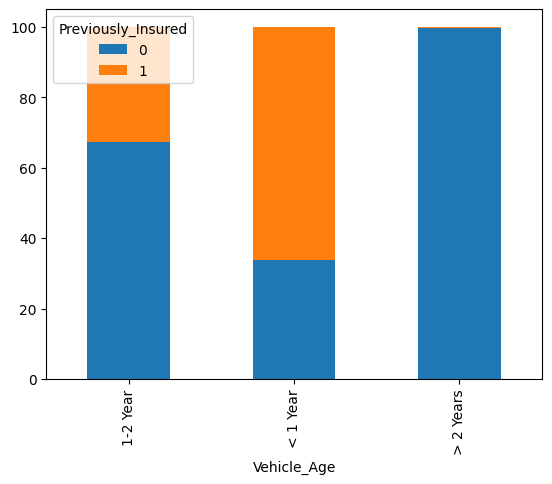

In [127]:
#plot stacked bar chart
fig12.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Older vehicles (>2 years) have almost no previous insurance coverage (hue = 0 dominates).

Newer vehicles (<1 year) have a high proportion of previously insured customers (hue = 1).

Vehicles aged 1-2 years have a mix, with a significant number of uninsured customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.Customers with vehicles >2 years old present a strong business opportunity as they are mostly uninsured.For new vehicle owners (<1 year), insurers should offer competitive renewal policies to retain them.1-2 year-old vehicle owners are partially insured, so customized offers and discounts can encourage policy adoption.









#### Chart - 13

13.Gender vs Previously insuranced?

In [128]:
# Chart - 13 visualization code
x = df.groupby(['Vehicle_Damage','Previously_Insured']).size()*100/df.groupby('Vehicle_Damage').size()
fig13 = x.unstack()
fig13

Previously_Insured,0,1
Vehicle_Damage,,
No,12.713571,87.286429
Yes,94.843384,5.156616


<Axes: xlabel='Vehicle_Damage'>

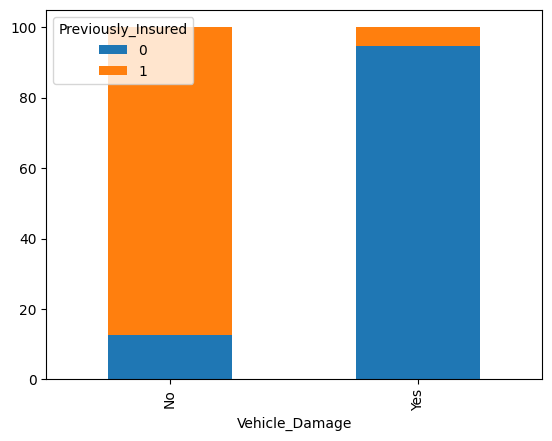

In [129]:
#plot stacked bar chart
fig13.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?



Customers with no vehicle damage have a high proportion of previously insured individuals (hue = 1).
Customers whose vehicles have been damaged are mostly uninsured (hue = 0 dominates).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uninsured customers with damaged vehicles are prime targets for insurance sales, as they now see the need for coverage.Risk-Based Pricing: Since previously insured customers have fewer damaged vehicles, insurance companies can offer them lower premium renewal plans to retain them.Urgency-Based Marketing: Uninsured customers with vehicle damage should be approached with urgent policy offerings, emphasizing protection from future expenses.

#### Chart - 14 - Correlation Heatmap

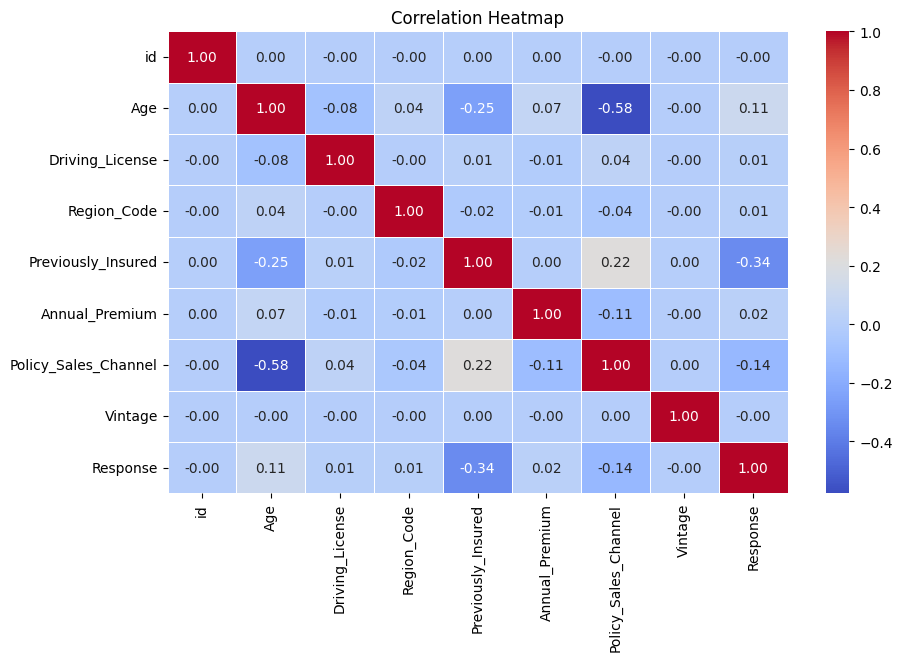

In [130]:

# Computing the correlation matrix
corr_matrix = df[['id', 'Age', 'Driving_License', 'Region_Code',
                 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel',
                 'Vintage', 'Response']].corr()

# Plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heat map is a graphical representation of the correlation matrix, where correlation coefficients between variables are displayed as colors in a grid.Correlation heat maps provide a visually intuitive way to explore relationships between variables

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Age and response are negatively correlated with previously insuranced.Policy Sales Channel and Age show a strong negative correlation (-0.58), meaning certain sales channels focus more on younger customers.

2.Remaining columns dont have correlation.

3.This chart is helpful in feature selection.

#### Chart - 15 - Pair Plot

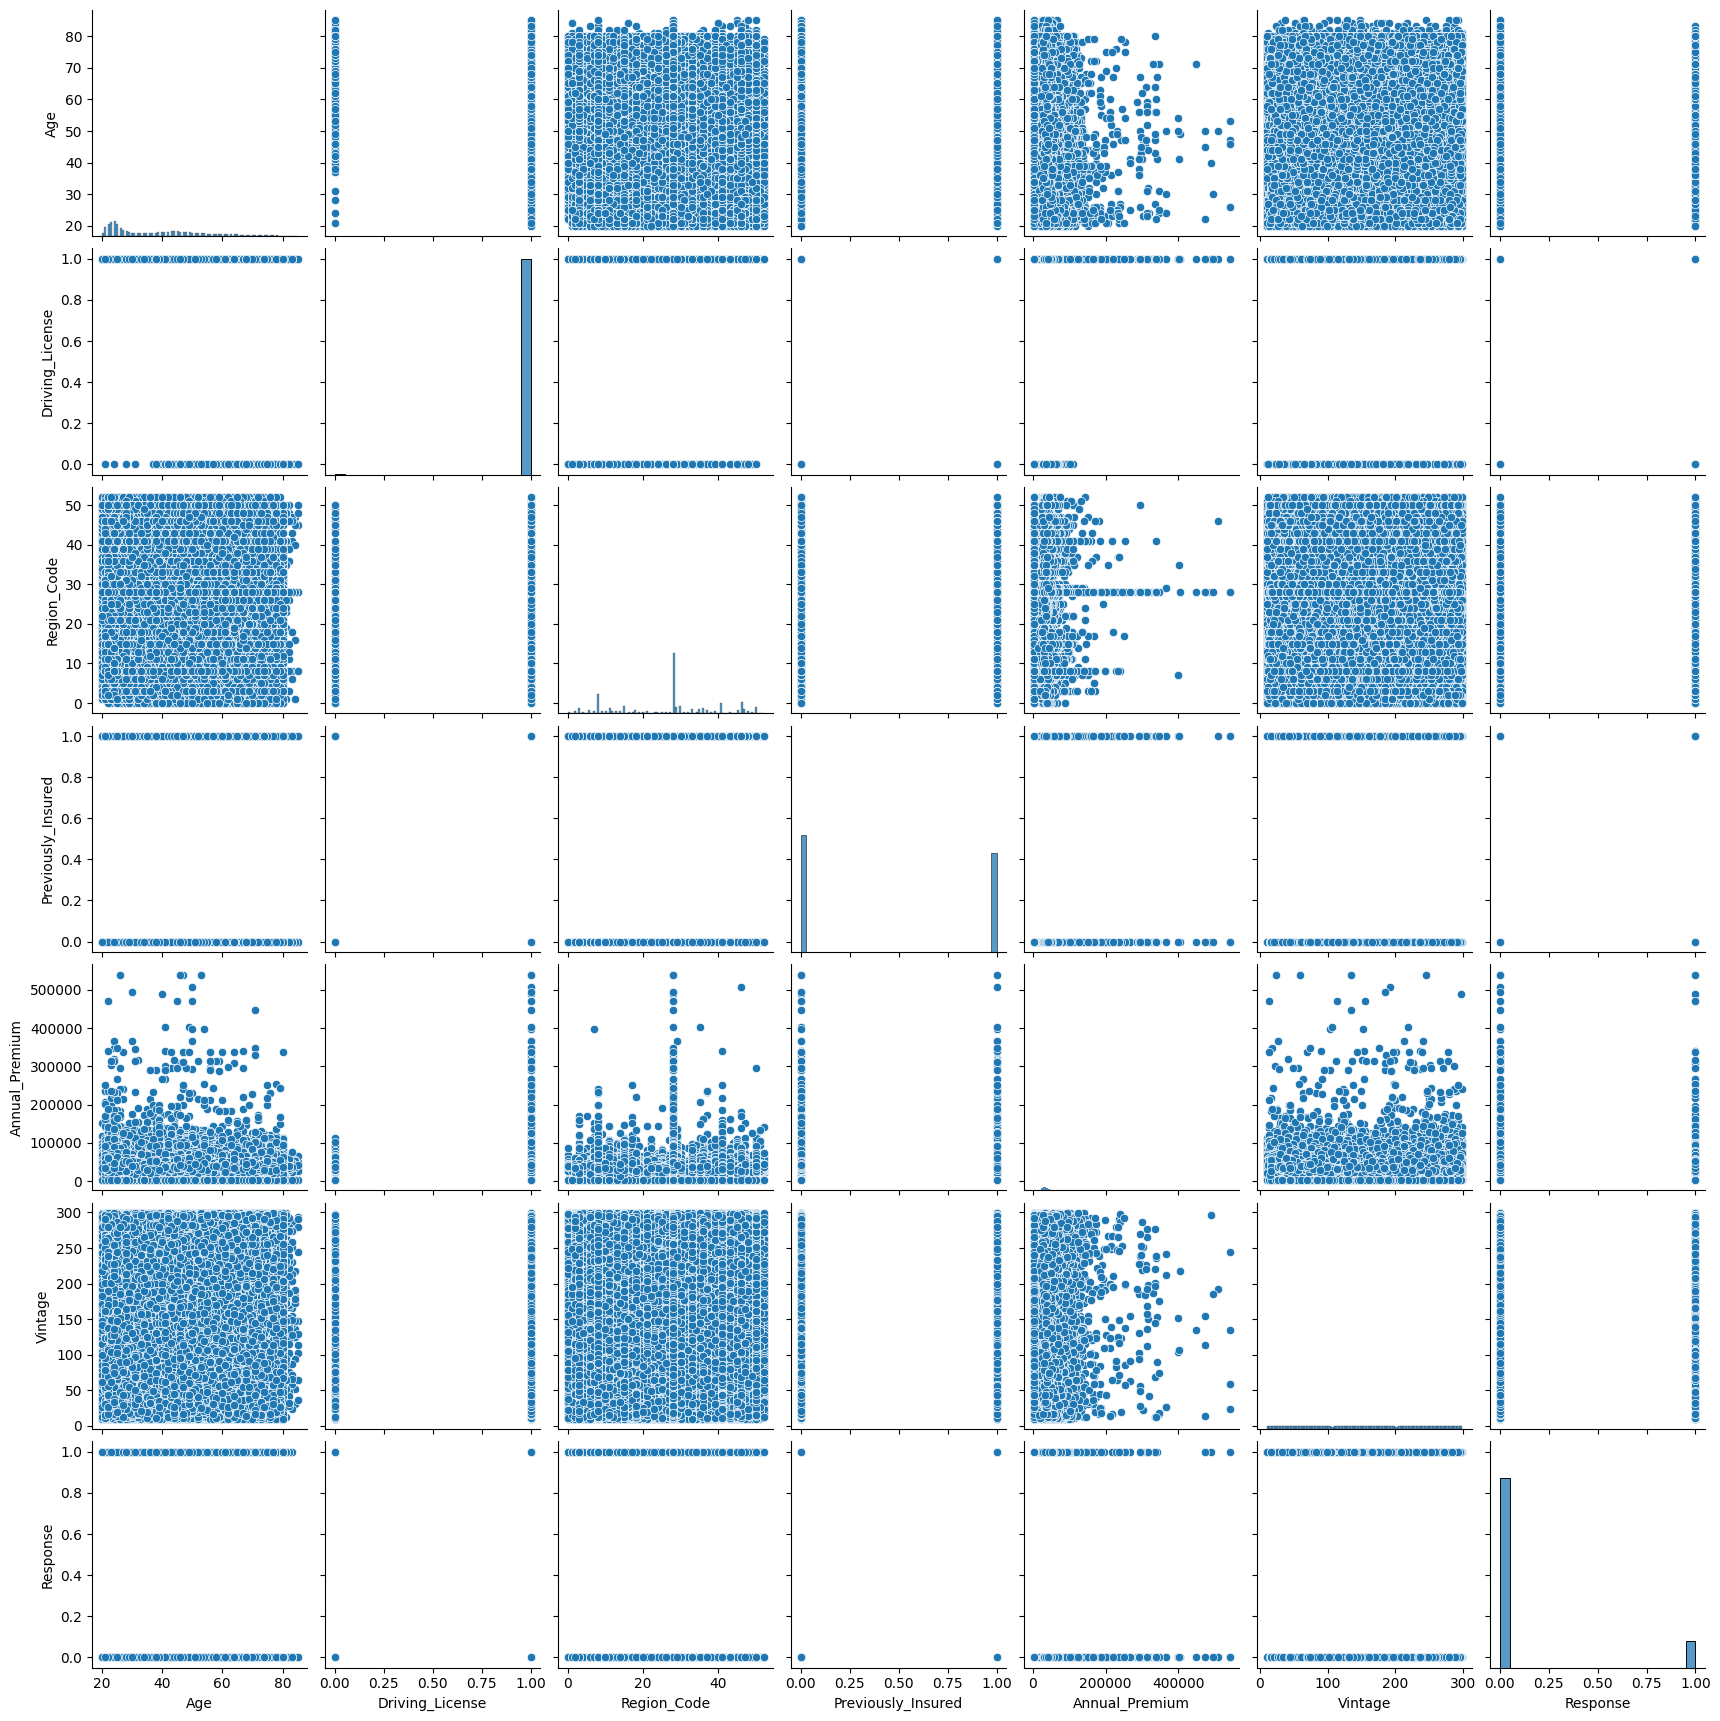

In [ ]:
# Pair Plot visualization code
sns.pairplot(df.loc[:,['Age', 'Driving_License', 'Region_Code',
       'Previously_Insured','Annual_Premium',
       'Vintage', 'Response'
       ]])

##### 1. Why did you pick the specific chart?

Pair plots, also known as scatterplot matrices, are a useful visualization tool for exploring relationships between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?



1.Age and response have relation with previously insuranced.

2.Remaining columns dont have relation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

The three hypothetical statements are

1.Male customers are more likely to buy health insurance than Female.

2.Mean of the annual premium is more than 40000.

3.Customers who have damaged vehicles don't want to get the health insurance.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : Male customers are more likely to buy health insurance than Female.

Alternate hypothesis:Male customers are not more likely to buy health insurance than Female.

#### 2. Perform an appropriate statistical test.

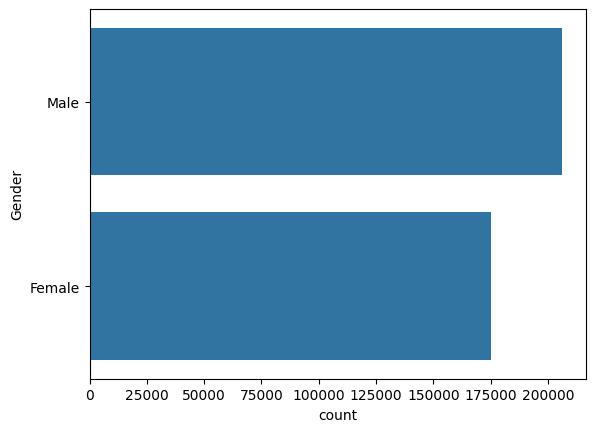

In [ ]:
#code for first statement
df_Response = df[df['Response'] == 'yes']
sns.countplot(y=df['Gender'], data= df_Response)
plt.show()

From the above,It can say that Null hypothesis is true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: Mean of the annual premium is more than 40000.

Alternate hypothesis: Mean of annual premium is less than or equal to 40000.

#### 2. Perform an appropriate statistical test.

In [ ]:
#code for second statement
df['Annual_Premium'].mean()

30564.389581458323

From the above, Null hypothesis is false.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : Customers who have damaged vehicles don't want to get the health insurance.

Alternate hypothesis : Customers who have damaged vehicles  want to get the health insurance.

#### 2. Perform an appropriate statistical test.

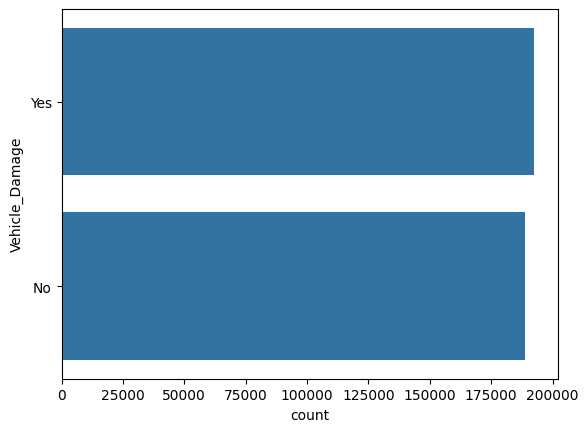

In [ ]:
#code for third statement
df_Vehicle_Damage = df[df['Response'] == 'yes']
sns.countplot(y=df['Vehicle_Damage'], data= df_Vehicle_Damage)
plt.show()

From the above,Null hypothesis is false.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [131]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values.

### 2. Handling Outliers

In [132]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [133]:
# Handling Outliers & Outlier treatments
#find skewness for Annual premium
df['Annual_Premium'].skew()

1.7660872148961309

It is not following normal distribution.

In [134]:
#find skewness for Age
df['Age'].skew()

0.6725389977260843

It follows normal distribution

In [135]:
mean = np.mean(df['Age'])
std_dev = np.std(df['Age'])

# Define outlier boundaries
lower_bound = mean - 3 * std_dev
print(lower_bound)
upper_bound = mean + 3 * std_dev
print(upper_bound)



-7.712188437031855
85.35735556769527


In [136]:
outliers = df[(df['Age'] <-7.712) | (df['Age'] >85.357)]

In [137]:
print(outliers)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


There are no outliers in Age column.

In [138]:
Q1 = df['Annual_Premium'].quantile(0.25)  # 25th percentile
Q3 = df['Annual_Premium'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define outliers (values beyond 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)


1912.5
61892.5


In [139]:
#filter dataframe with annual premium grater than 1912.5 and less than 61892.5
outliers = df[(df['Annual_Premium']<1912.5) | (df['Annual_Premium']>61892.5)]

In [140]:
outliers

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380959,380960,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381035,381036,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


In [141]:
#filter dataframe with annual premium grater than 1912.5 and less than 61892.5
df_new = df[(df['Annual_Premium']>1912.5) & (df['Annual_Premium']<61892.5)]

In [142]:
#dataframe without outliers
df_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


##### What all outlier treatment techniques have you used and why did you use those techniques?

1.For Age column,I used 3-Sigma Rule removal technique because it follows normal distribution.

2.For Annual premium column.I used IQR removal technique because it is skewed distribution.

### 3. Categorical Encoding

In [143]:
df_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


######CONVERT CATEGORICAL VALUES TO NUMERICAL VALUES

In [144]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()
df_new['Gender'] = labelEncoder.fit_transform(df_new['Gender'])
df_new['Vehicle_Age'] = labelEncoder.fit_transform(df_new['Vehicle_Age'])
df_new['Vehicle_Damage'] = labelEncoder.fit_transform(df_new['Vehicle_Damage'])

<ipython-input-144-ec2cb2fa009a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Gender'] = labelEncoder.fit_transform(df_new['Gender'])
<ipython-input-144-ec2cb2fa009a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Vehicle_Age'] = labelEncoder.fit_transform(df_new['Vehicle_Age'])
<ipython-input-144-ec2cb2fa009a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [145]:
df_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used label encoding to change categorical features to numerical features.

### 4. Feature Manipulation & Selection

#### Feature Selection

In [146]:
# Select your features wisely to avoid overfitting
x_1=df_new.drop(['Policy_Sales_Channel','Driving_License','Vintage','Response'],axis=1)
y_1 = df_new['Response']

In [147]:
x_1

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium
0,1,1,44,28.0,0,2,1,40454.0
1,2,1,76,3.0,0,0,0,33536.0
2,3,1,47,28.0,0,2,1,38294.0
3,4,1,21,11.0,1,1,0,28619.0
4,5,0,29,41.0,1,1,0,27496.0
...,...,...,...,...,...,...,...,...
381104,381105,1,74,26.0,1,0,0,30170.0
381105,381106,1,30,37.0,1,1,0,40016.0
381106,381107,1,21,30.0,1,1,0,35118.0
381107,381108,0,68,14.0,0,2,1,44617.0


##### What all feature selection methods have you used  and why?

I used correlation heat map to select features.

##### Which all features you found important and why?

1.Id is not a important feature beacause it doesnt have any relationship with target variable.

2.Driving license is not an important feature because 99.7% customers have it.

3.Vintage is not an important feature because it follows uniformm distribution and it dont have correlation with target variable.

4.Response is the target variable, so it should NOT be used as a feature during model training.If it's being dropped in feature selection, it's likely because you're selecting only independent variables.

4.Remaining features are important because they have correlation with target variable.

### 5. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is imbalanced, with 87.7% of customers not accepting the plan and only 12.3% accepting it. In a balanced dataset, the target variable typically follows a 50:50 or 60:40 ratio, whereas in this case, it follows an 87:12 distribution.To address the class imbalance in the dataset, we apply Random OverSampling to balance the target variable distribution.

In [148]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize RandomOverSampler
random_sample = RandomOverSampler(random_state=42)

# Apply oversampling to the dataset
x_new, y_new = random_sample.fit_resample(x_1, y_1)

# Print class distribution before and after resampling
print('Original dataset shape:', Counter(y_1))
print('Resampled dataset shape:', Counter(y_new))


Original dataset shape: Counter({0: 325634, 1: 45155})
Resampled dataset shape: Counter({1: 325634, 0: 325634})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used Random Over Sampler to handle imbalance dataset because it addresses this issue by oversampling the minority class or classes, essentially creating synthetic data points by randomly replicating existing minority class samples until the class distribution is more balanced. This helps in training a classifier that is less biased towards the majority class and can better generalize to unseen data.

### 6. Data Splitting

In [149]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size = 0.3, random_state = 0)

##### What data splitting ratio have you used and why?

I opted for a 70:30 train-test split, a common practice in machine learning, to ensure a balanced approach between training the model effectively and evaluating its performance while minimizing overfitting.

### 7. Data Scaling

Feature scaling is essential to standardize the dataset, ensuring that all numerical features contribute equally to the model's learning process and improving its performance

In [150]:
#import necessary library
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

We used Standardization (StandardScaler) method for Data Scaling.

The dataset has been standardized, transforming numerical features to have a mean of 0 and a standard deviation of 1, which helps improve model convergence and performance




## ***7. ML Model Implementation***

### ML Model - 1

In [151]:
# ML Model - 1 Implementation
lr = LogisticRegression()
#fit model to both train sets
lr.fit(x_train,y_train)
# Predict on the model
lr_pred= lr.predict(x_test)
lr_prob = lr.predict_proba(x_test)[:,1]
#Stores the predicted probabilities for the positive class, which can be used for metrics like AUC-ROC, precision-recall curves, or setting custom decision thresholds.

In [152]:
#Get the recall score
#The recall score is a measure of how well the model identifies positive cases (customers who are interested in purchasing the insurance).
recall_score(y_test, lr_pred)


0.976128979357563

A recall of 0.9761 (or 97.61%) means that 97.61% of the actual interested customers were correctly identified by the model.Out of all the actual positive cases (customers who are truly interested), how many did the model correctly predict as interested.

In [153]:

# Get the precision scores
#The precision score measures how many of the predicted positive cases (customers classified as interested) are actually correct.
test_precision = precision_score(y_test,lr_pred)
print("The precision on test data is ", (test_precision))

The precision on test data is  0.7058827889326188


In [154]:

# Get the accuracy scores
test_accuracy = accuracy_score(y_test,lr_pred)
print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.7849790921328071


Out of all the customers the model predicted as interested, how many are truly interested
A precision score of 0.7059 (or 70.59%) means that only 70.59% of the customers classified as "interested" by the model are actually interested.

In [155]:
#Get the f1 score
#The F1 score is a balance between precision and recall, providing a single metric that considers both false positives and false negatives.
f1_score(y_test, lr_pred)

0.8192958685506592

The F1 score is useful when you need a balance between precision (correctly identifying actual interested customers) and recall (capturing as many interested customers as possible).
An F1 score of 81.93% indicates a strong balance between correctly predicting interested customers and minimizing misclassifications.

In [156]:

# Get the roc_auc_score scores
#The ROC-AUC score measures the model's ability to distinguish between positive and negative classes.
test_roc_auc_score = roc_auc_score(y_test,lr_prob)
print("The roc_auc_score on test data is ", test_roc_auc_score)

The roc_auc_score on test data is  0.8111102472696919


A score of 81.11% indicates that the model is fairly good at differentiating between interested and uninterested customers.
The closer the score is to 1, the better the model is at classification.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[58133 39682]
 [ 2329 95237]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

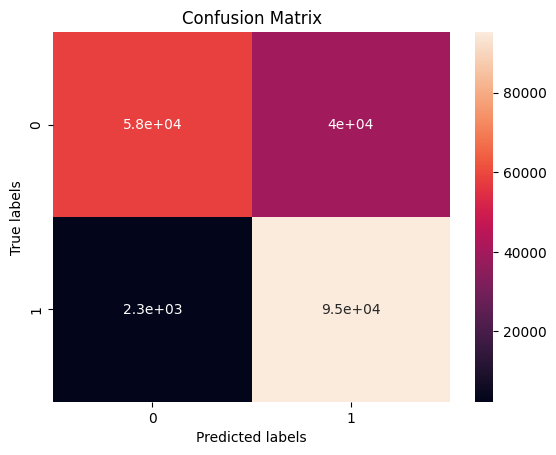

In [157]:
# Get the confusion matrix for test set



labels = ['0', '1']
cm = confusion_matrix(y_test, lr_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

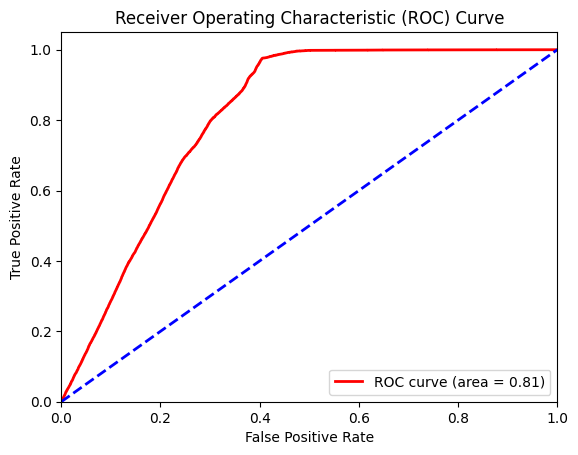

In [158]:

# Compute ROC curve and AUC
#Higher AUC means the model is good at differentiating between customers who are likely to accept the plan and those who are not.
#The ROC Curve helps assess how well the model separates the positive and negative classes.
fpr, tpr, thresholds = roc_curve(y_test, lr_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC-AUC score of 0.81 indicates that the model has a good ability to distinguish between positive and negative classes, making it a reliable predictor for classification tasks.The roc score is near to 1 is good model and less than 0.5 is bad model.This model got roc score of 0.81.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [159]:
#built the model

rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(x_train,y_train)

# Predict on the model
# Making predictions on train and test data
rf_train_pred = rf_model.predict(x_train)
rf_test_pred = rf_model.predict(x_test)
rf_prob = rf_model.predict_proba(x_test)[:,1]

In [160]:
#get roc score for test set
roc_auc_score(y_test, rf_prob)

0.9976509776875764

In [161]:
#Get the recall score
#The recall score is a measure of how well the model identifies positive cases (customers who are interested in purchasing the insurance).
recall_score(y_test,rf_test_pred)


0.9964741815796486

In [162]:

# Get the precision scores
#The precision score measures how many of the predicted positive cases (customers classified as interested) are actually correct.
test_precision = precision_score(y_test,rf_test_pred)
print("The precision on test data is ", (test_precision))

The precision on test data is  0.8915032919471088


In [163]:

# Get the accuracy scores
test_accuracy = accuracy_score(y_test,rf_test_pred)
print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.9376807366120554


In [164]:
#Get the f1 score
#The F1 score is a balance between precision and recall, providing a single metric that considers both false positives and false negatives.
f1_score(y_test, rf_test_pred)

0.9410705643209757

[[85983 11832]
 [  344 97222]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

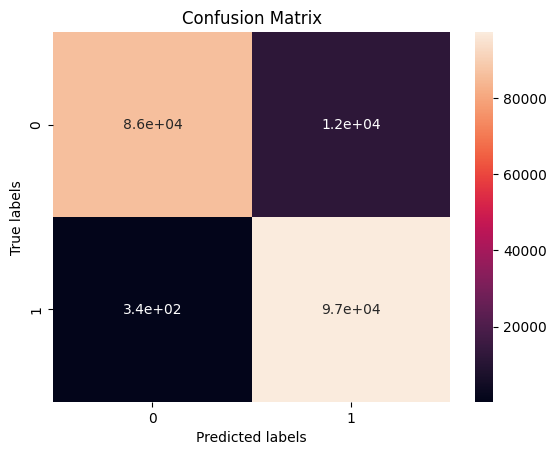

In [165]:
# Get the confusion matrix for test set

labels = ['0', '1']
cm = confusion_matrix(y_test, rf_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

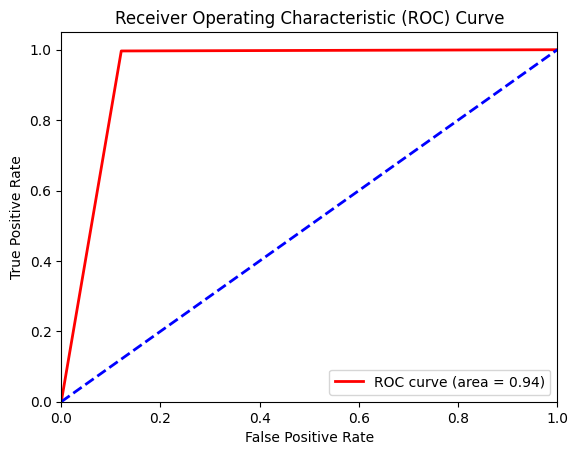

In [166]:


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve rises sharply towards True Positive Rate (TPR) = 1 at a very low False Positive Rate (FPR).
This suggests that the model achieves high sensitivity (recall) with minimal false positives.I used Random forest classifier.The important evaluation metric for this algorithm is Roc-Auc curve.The Area Under the Curve (AUC) is 0.94, which indicates a strong model with excellent discriminatory power.
AUC values close to 1 suggest that the model effectively differentiates between the positive and negative classes.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### **Evaluation Metrics and Business Impact**  

1. **Accuracy** – Measures overall correctness but can be misleading for imbalanced datasets. Used for general performance evaluation.  

2. **Precision** – Indicates how many predicted positives are actually correct. Important in fraud detection and spam filtering to reduce false positives.  

3. **Recall** – Measures how many actual positives are correctly identified. Critical in healthcare and risk assessment to minimize false negatives.  

4. **F1 Score** – Balances precision and recall, making it effective for imbalanced datasets. Used in lead scoring and fraud prevention.  

5. **AUC-ROC** – Assesses the model’s ability to distinguish between classes. Helps optimize thresholds in credit risk and insurance decision-making.  

### **Business Impact**  
- The model’s impact depends on business goals.  
- **High precision** is needed where false positives are costly (e.g., fraud detection).  
- **High recall** is preferred where missing positive cases is risky (e.g., healthcare).  
- **AUC-ROC** helps in adjusting thresholds for better decision-making.

### ML Model - 3

In [167]:
# ML Model - 3 Implementation
XG_model= XGBClassifier()
# Fit the Algorithm
XG_model= XG_model.fit(x_train, y_train)
#Making prediction
XG_pred = XG_model.predict(x_test)
XG_prob = XG_model.predict_proba(x_test)[:,1]


In [168]:
#Get the roc score
roc_auc_score(y_test, XG_prob)

0.8638348361130046

In [169]:
#Get the recall score
recall_score(y_test,XG_pred)


0.9376319619539594

In [170]:
#get the accuracy score
accuracy_score(y_test,XG_pred)

0.8095311212451569

In [171]:
#get the precission score
precision_score(y_test,XG_pred)

0.7461136938259522

In [172]:
#Get the f1 score
f1_score(y_test, XG_pred)

0.830980670009447

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[66686 31129]
 [ 6085 91481]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

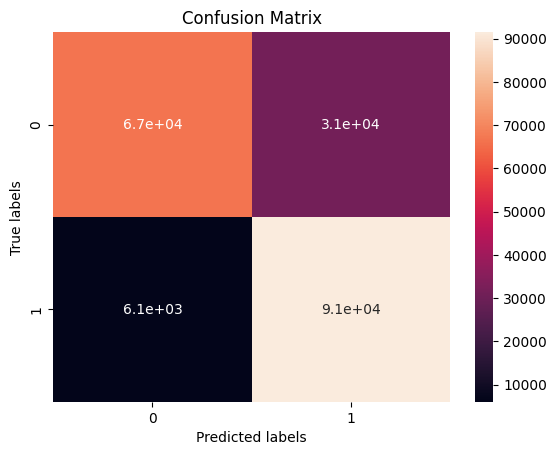

In [173]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test set

labels = ['0', '1']
cm = confusion_matrix(y_test, XG_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

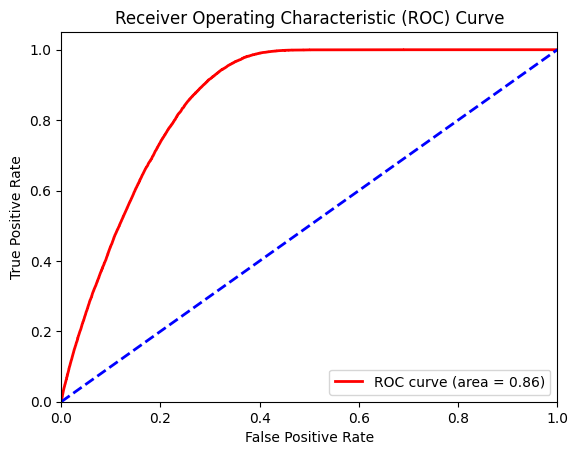

In [175]:

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, XG_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I consider the ROC-AUC score for a positive business impact because it evaluates the model’s ability to differentiate between positive and negative cases across various threshold settings. The ROC curve visualizes the trade-off between true positive and false positive rates, while the AUC value quantifies the model’s overall classification performance. A higher AUC-ROC indicates better decision-making efficiency, which is essential for identifying potential buyers accurately and optimizing business strategies.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the  Random Forest classifier model with the highest ROC-AUC score as the final prediction model because it demonstrates superior ability to distinguish between classes across different thresholds. A higher AUC-ROC score indicates better predictive performance, ensuring accurate identification of potential buyers while minimizing false positives and negatives. This helps optimize business decisions, improve targeting strategies, and enhance overall efficiency.

# **Conclusion**

Starting from loading the dataset, I performed data cleaning and exploratory data analysis (EDA) to understand the data. This was followed by data preprocessing steps, including handling missing values and outliers, feature selection, addressing class imbalance, data splitting, feature scaling, and selecting appropriate machine learning algorithms.

For model building, I experimented with Logistic Regression, Random Forest Classifier, and XGBoost Classifier. The ROC-AUC scores for all models ranged between 80% and 95%. Among them, the Random Forest Classifier achieved the highest ROC-AUC score of 94%, making it the final model choice. This model provides a strong balance between accuracy and interpretability, ensuring better predictive performance for business decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***